Initializing:

In [0]:
__author__      = "JoanDoe11"

import multiprocessing as mp
import random
from functools import partial
import numpy as np

Matrix util functions:

In [0]:
# matrix initalization - creates a matrix (width x height) and fill it with 0s and 1s
# 1 = alive, 0 = dead
def init_matrix(width, height):
  matrix = [[[0 for k in range(3)] for j in range(width)] for i in range(height)]

  for i in range(height):
    for j in range(height):
      matrix[i][j] = [i,j,random.randrange(0, 2)]

  return matrix

# printing matrix
def print_matrix(matrix, height, width):
  for i in range(height):
      for j in range(width):
          print(matrix[i][j][2],end = "  ")
      print("\n")

# transforms given chunks to a 3d matrix
def transform_to_matrix(chunks, width, height):
  matrix = [[[x,y,-1] for x in range(height)]for y in range(width)]
  for l in chunks:
    for item in l:
      matrix[item[0]][item[1]] = [item[0],item[1],item[2]]
  return matrix

# transforms 3d matrix to 2d matrix
def matrix3dTo2d(matrix, width, height):
  result = [[0 for x in range(height)]for y in range(width)]
  for i in range(height):
    for j in range(width):
      result[i][j] = matrix[i][j][2]
  return result

Game of life functions:

In [0]:
# calculates number of alive neighbours for a given cell
def sum_neighbours(row, column, matrix):
  sum = 0
  sum += matrix[(row-1)%height][(column-1)%width][2]
  sum += matrix[(row-1)%height][column][2]
  sum += matrix[(row-1)%height][(column+1)%width][2]
  sum += matrix[row][ (column-1)%width][2]
  sum += matrix[row][ (column+1)%width][2]
  sum += matrix[(row+1)%height][(column-1)%width][2]
  sum += matrix[(row+1)%height][column][2]
  sum += matrix[(row+1)%height][ (column+1)%width][2]

  return sum

# calculates next state for a given cell
def calculate_state(neighbour_sum, curr_state):
  new_state = 0

  if(curr_state==1):
      if(neighbour_sum<2):
        #print(">dead")
        new_state = 0
      elif(neighbour_sum<=3):
        #print("alive")
        new_state = 1
      else:
        #print(">dead")
        new_state = 0
  else:
      if(neighbour_sum==3):
        #print(">alive")
        new_state = 1
      else:
        #print("dead")
        new_state = 0

  return new_state

Parallel work:

In [0]:
def task(matrix, iterations, whole_matrix):
  result = []
  for chunk in matrix:
    for item in chunk:
      new_state = item
      neigh_sum = sum_neighbours(item[0],item[1],whole_matrix)
      new_state[2] = calculate_state(neigh_sum, item[2])
      result.append(new_state)

  return result

# Main:


In [0]:
width = 10
height = 10
iterations = 50
n = 20 # number of chunks

matrix = init_matrix(width, height)

animation_matrix = []
animation_matrix.append(matrix3dTo2d(matrix, width, height))

pool = mp.Pool(processes = n)

for i in range(iterations):
  f = partial(task, iterations=iterations, whole_matrix = matrix)
  temp = np.array(matrix)
  matrix_chunks = np.array_split(temp, n)
  result = pool.map(f, matrix_chunks, chunksize = n)

  state_matrix = transform_to_matrix(result, width, height)
  animation_matrix.append(matrix3dTo2d(state_matrix, width, height))
  matrix = state_matrix

pool.terminate()

# Animation:
*not my code*

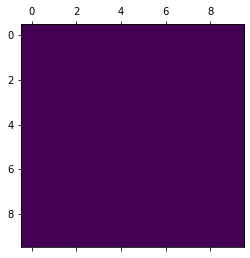

In [50]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

def animate(steps):
  def init():
    im.set_data(steps[0])
    return [im]
  
  
  def animate(i):
    im.set_data(steps[i])
    return [im]

  im = plt.matshow(steps[0], interpolation='None', animated=True);
  
  anim = FuncAnimation(im.get_figure(), animate, init_func=init,
                  frames=len(steps), interval=500, blit=True, repeat=False);
  return anim

steps = [(np.array(m)).astype(np.int8)for m in animation_matrix]
anim = animate(steps);
HTML(anim.to_html5_video())